In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
        Alan Liang <br>
            Umar Maniku<br>
            Yiyang Chen <br>
            Bennett Somerville <br>
            Akhil Venkatesh <br>
</table>

# Lab 7: Macroeconomic Policy

In [2]:
!pip install fredapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import * 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit
import math
from math import *
import seaborn as sns
import itertools
from fredapi import Fred
%matplotlib inline

  Using cached fredapi-0.5.2-py3-none-any.whl (11 kB)


## Macroeconomic Data and FRED API

We will start by first downloading some macroeconomic data from FRED. In this notebook, we will introduce the FRED API (Application Programming Interface).  

**What is an API?**  
In contrast to a user interface, which connects a computer to a person, an application programming interface (API) connects computers or pieces of software to each other. It is not intended to be used directly by a person (the end user) other than a computer programmer who is incorporating it into the software. An API is often made up of different parts which act as tools or services that are available to the programmer. A program or a programmer that uses one of these parts is said to call that portion of the API. The calls that make up the API are also known as subroutines, methods, requests, or endpoints. An API specification defines these calls, meaning that it explains how to use or implement them. [Wikipedia]

### Part 1: Get the API Key

In most cases, you will need to get an API key in order to access an API. For some resources, it involves some paperwork to apply and/or limited free usage. For FRED, the process of getting an API key is simple. Make an account and request the API key [here](https://fred.stlouisfed.org/docs/api/api_key.html).

**Question 1.1:** Request a FRED API key and paste it below.


In [3]:
my_api_key = "e8467145d47eef76adbbfd9a27195264"

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Part 2: Access the API using the `fredapi` package

In lecture, we discussed how to use APIs generally. In this lab, we skip straight to using the `fredapi` package to interact with the FRED API. First, we initialize a `Fred` object with our API key.

In [5]:
fred = Fred(api_key=my_api_key)

To access data from the FRED API, we need to know the series ID for the data we want. You can find this using the [FRED](https://fred.stlouisfed.org) website. For example, by searching for GDP, we can see on the [FRED page for Gross Domestic Product](https://fred.stlouisfed.org/series/GDP) that the series ID is GDP, as written in parentheses.

In [6]:
gdp_df = pd.DataFrame(fred.get_series('GDP'))
gdp_df.head(10)

,0
1946-01-01,NaN
1946-04-01,NaN
1946-07-01,NaN
1946-10-01,NaN
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
1948-04-01,272.567


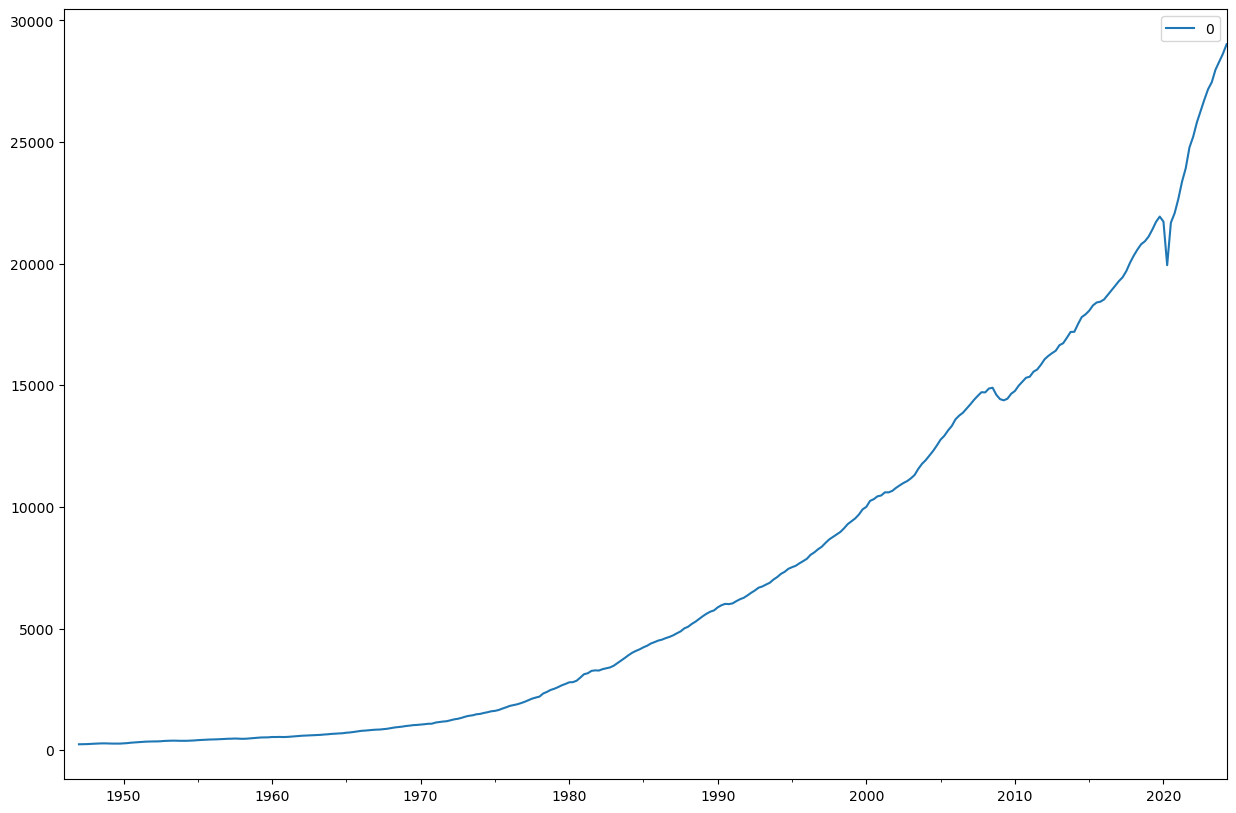

In [7]:
gdp_df.plot(figsize=(15, 10));

<!-- BEGIN QUESTION -->

**Question 2.1**: Find the series ID for the federal funds rate, and use it to graph the federal funds rate over time.

*Hint: There are multiple series ID for the federal funds rate; use the one that updates monthly. You may need to click "2 other formats" to find the series that updates monthly.*


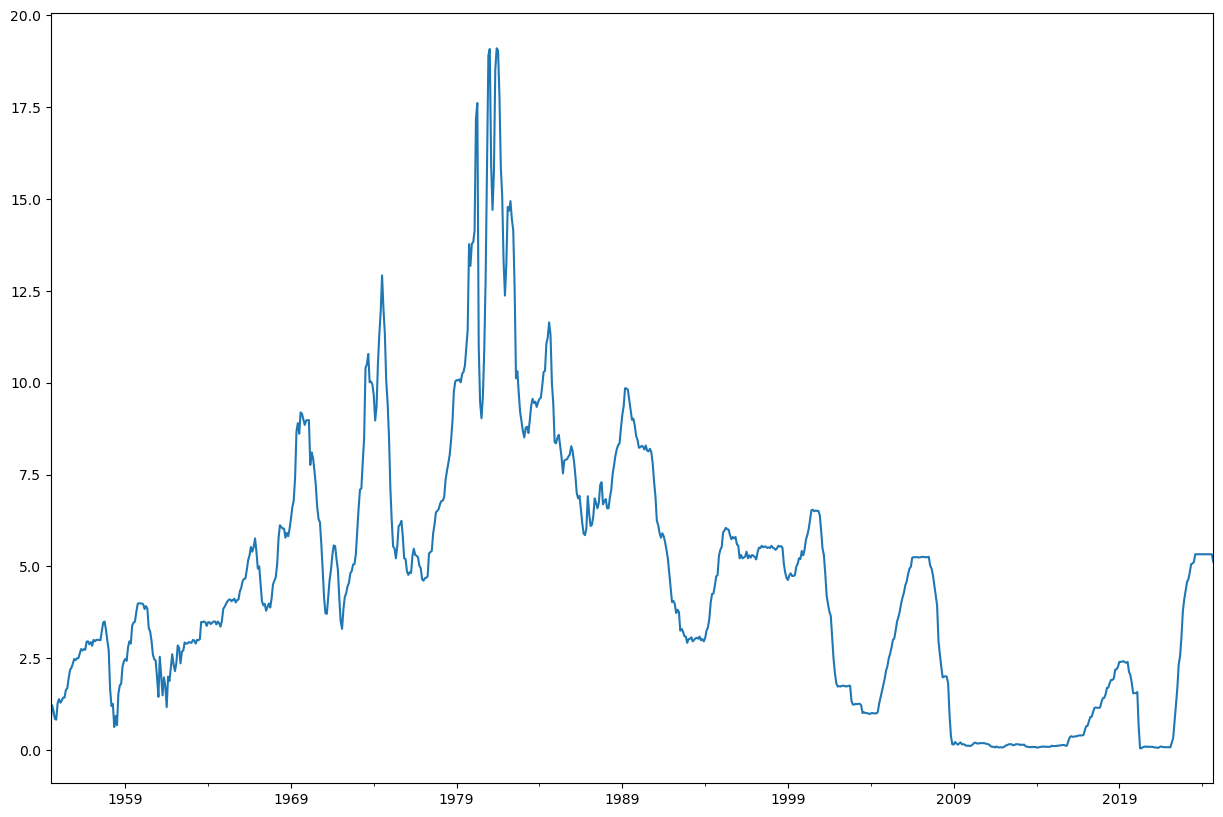

In [8]:
fred.get_series("FEDFUNDS").plot(figsize=(15, 10)); 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.2**: Find the series ID for the unemployment rate, and use it to graph the unemployment rate over time.

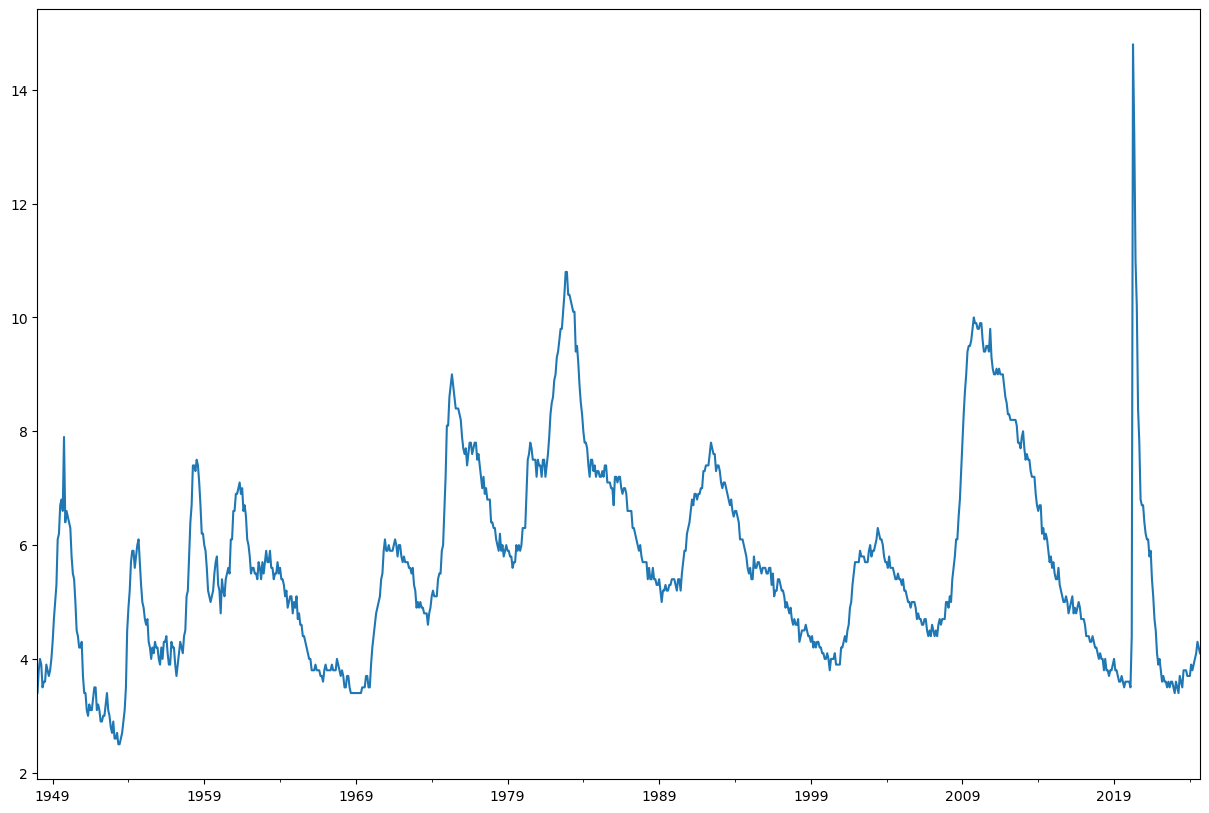

In [9]:
fred.get_series("UNRATE").plot(figsize=(15, 10));

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3**: What spikes do you see since 2000? What events do they correlate with?

We see a spike around 2000, 2009 and 2020. These correlate with the 2000 dot com bubble, the 2008 Financial Crisis, and the COVID-19 pandemic. These would have lead to rapid increase in unemployment due to company layoffs and businesses defaulting. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.4**: Find the series ID for the consumer price index that excludes food and energy, and use it to graph inflation over time. In this case, we want to get quarterly data and put the data in units of percent change from a year ago, because the percent change in CPI tells us the inflation rate. To find the values of these parameters parameters, look at [the FRED documentation for the `fred/series/observations` endpoint](https://fred.stlouisfed.org/docs/api/fred/series_observations.html).



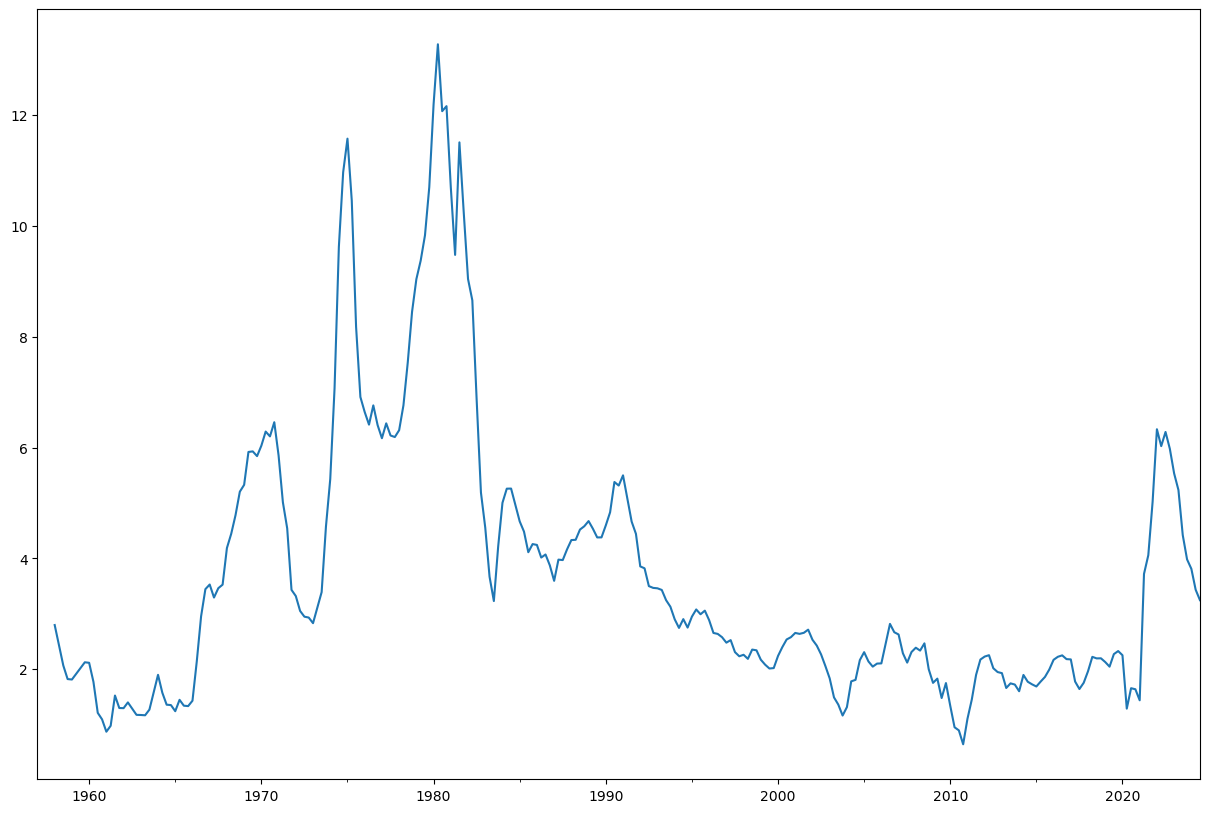

In [10]:
fred.get_series("CPILFESL", frequency="q", units="pc1").plot(figsize=(15, 10));

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.5**: What do you notice about inflation over the past 4 years? In 2008? Why might these trends exist?

We observe peaks in inflation, notably during the 2008 crisis and the recent 2021-2022 inflation surge due to COVID. The 2008 spike was related to the financial crisis, while the more recent inflationary pressures are caused from COVID resulting in supply chain disruptions which would lead to an increase in demand since people wanted to buy. There were also a shortage of workers due to the restrictions in place due to the pandemic. 

<!-- END QUESTION -->

### Part 3: Use the FRED API to graph a Phillips curve

<!-- BEGIN QUESTION -->

**Question 3.1**: Recalling what you learned in lecture, what macroeconomic indicators does the Phillips curve relate? Is the correlation usually negative or positive? What is the intuition behind this relationship?


The Phillips Curve describes an inverse relationship between inflation rate and unemployment. The correlation is useually negative i.e. when the inflation is low, the level of unemployment tends to be high vice-versa. When unemployemnt is low, price level increases more rapidly. The intuition behind the curve comes from the fact that with economic growth, we see inflation as well and this leads to more jobs and less uneployment. 

<!-- END QUESTION -->

To start, we will use the unemployment rate and inflation data to graph a Phillips curve. The `fred` package's `get_series` function returns a Pandas series, which we turn into a Pandas dataframe. To convert to Data 8 tables, we use, the `datascience` package's `Table.from_df` function.

In [11]:
unemployment_table = Table.from_df(
    pd.DataFrame(
        fred.get_series('UNRATE')
    ).rename(columns={0:'unemployment_rate'}).reset_index()
)
unemployment_table

index,unemployment_rate
1948-01-01 00:00:00,3.4
1948-02-01 00:00:00,3.8
1948-03-01 00:00:00,4
1948-04-01 00:00:00,3.9
1948-05-01 00:00:00,3.5
1948-06-01 00:00:00,3.6
1948-07-01 00:00:00,3.6
1948-08-01 00:00:00,3.9
1948-09-01 00:00:00,3.8
1948-10-01 00:00:00,3.7


Next, we will grab the inflation data like we did in question 2.5.

In [12]:
inflation_table = Table.from_df(
    pd.DataFrame(
        fred.get_series('CPILFESL', units='pc1', frequency='q')
    ).rename(columns={0:'inflation_rate'}).dropna().reset_index()
)
inflation_table

index,inflation_rate
1958-01-01 00:00:00,2.7972
1958-04-01 00:00:00,2.42775
1958-07-01 00:00:00,2.06659
1958-10-01 00:00:00,1.82232
1959-01-01 00:00:00,1.81406
1959-04-01 00:00:00,1.91874
1959-07-01 00:00:00,2.02475
1959-10-01 00:00:00,2.12528
1960-01-01 00:00:00,2.11581
1960-04-01 00:00:00,1.77187


<!-- BEGIN QUESTION -->

**Question 3.2**: We now have to *join* the two datasets. This should be familiar from Data 8, but if you need a quick refresher, feel free to reference over [section 8.4 in the Data 8 textbook](https://inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html). Each row in our `phillips_curve_table` should report the unemployment rate and CPI for the same date, if `unemployment_table` and `inflation_table` both have data at that date.


In [17]:
phillips_curve_table = unemployment_table.join('index', inflation_table)
phillips_curve_table

index,unemployment_rate,inflation_rate
1958-01-01 00:00:00,5.8,2.7972
1958-04-01 00:00:00,7.4,2.42775
1958-07-01 00:00:00,7.5,2.06659
1958-10-01 00:00:00,6.7,1.82232
1959-01-01 00:00:00,6,1.81406
1959-04-01 00:00:00,5.2,1.91874
1959-07-01 00:00:00,5.1,2.02475
1959-10-01 00:00:00,5.7,2.12528
1960-01-01 00:00:00,5.2,2.11581
1960-04-01 00:00:00,5.2,1.77187


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.3**: Graph the Phillips curve, showing the relationship between the unemployment rate and inflation.


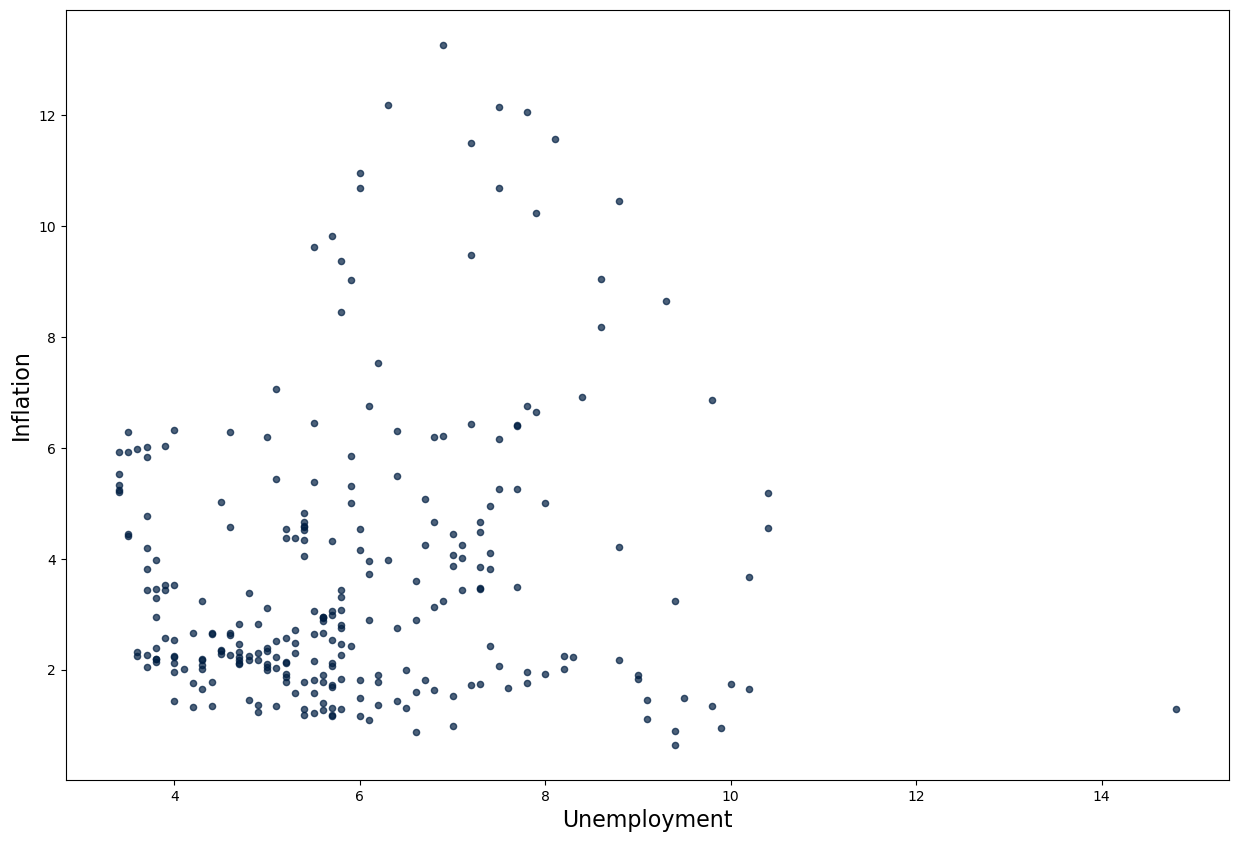

In [18]:
phillips_curve_table.scatter('unemployment_rate', 'inflation_rate', width=15, height=10)
plt.xlabel("Unemployment")
plt.ylabel("Inflation");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.4**: Let's add a "decade" column to the table so we can color the points based on what decade they fell in. To do this, write a function (named `find_year_for_date`) that returns the decade of a given date, and then apply it to the `index` column on the `phillips_curve_table`. If you need a refresher on the `apply` function, consult [the Data 8 textbook](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html).

*Hint: you can get the year of the `date` parameter with `date.year`.*


In [19]:
def find_year_for_date(date):
    the_year = date.year
    decade = the_year - (the_year % 10)
    return decade

phillips_curve_table = phillips_curve_table.with_columns(
    'decade', 
    phillips_curve_table.apply(find_year_for_date, 'index')
)
phillips_curve_table

index,unemployment_rate,inflation_rate,decade
1958-01-01 00:00:00,5.8,2.7972,1950
1958-04-01 00:00:00,7.4,2.42775,1950
1958-07-01 00:00:00,7.5,2.06659,1950
1958-10-01 00:00:00,6.7,1.82232,1950
1959-01-01 00:00:00,6,1.81406,1950
1959-04-01 00:00:00,5.2,1.91874,1950
1959-07-01 00:00:00,5.1,2.02475,1950
1959-10-01 00:00:00,5.7,2.12528,1950
1960-01-01 00:00:00,5.2,2.11581,1960
1960-04-01 00:00:00,5.2,1.77187,1960


<!-- END QUESTION -->

The code for the graph below is beyond the scope of this course. You don't need to understand it but feel free to find the documentation for the seaborn package if you're interested.

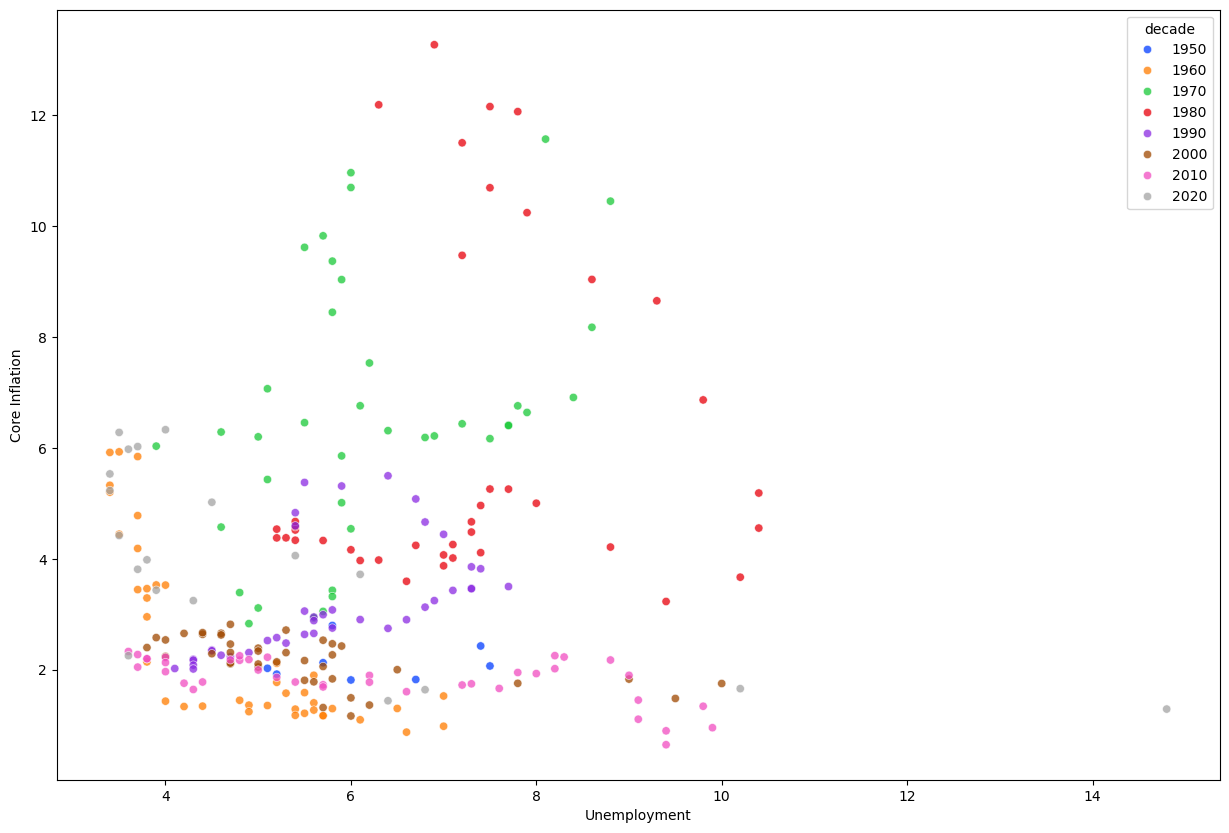

In [20]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="unemployment_rate", y="inflation_rate", data=phillips_curve_table, 
                hue="decade", palette="bright", alpha=0.75)
plt.xlabel("Unemployment")
plt.ylabel("Core Inflation")
plt.show();

We can add best fit lines for each decade, too.

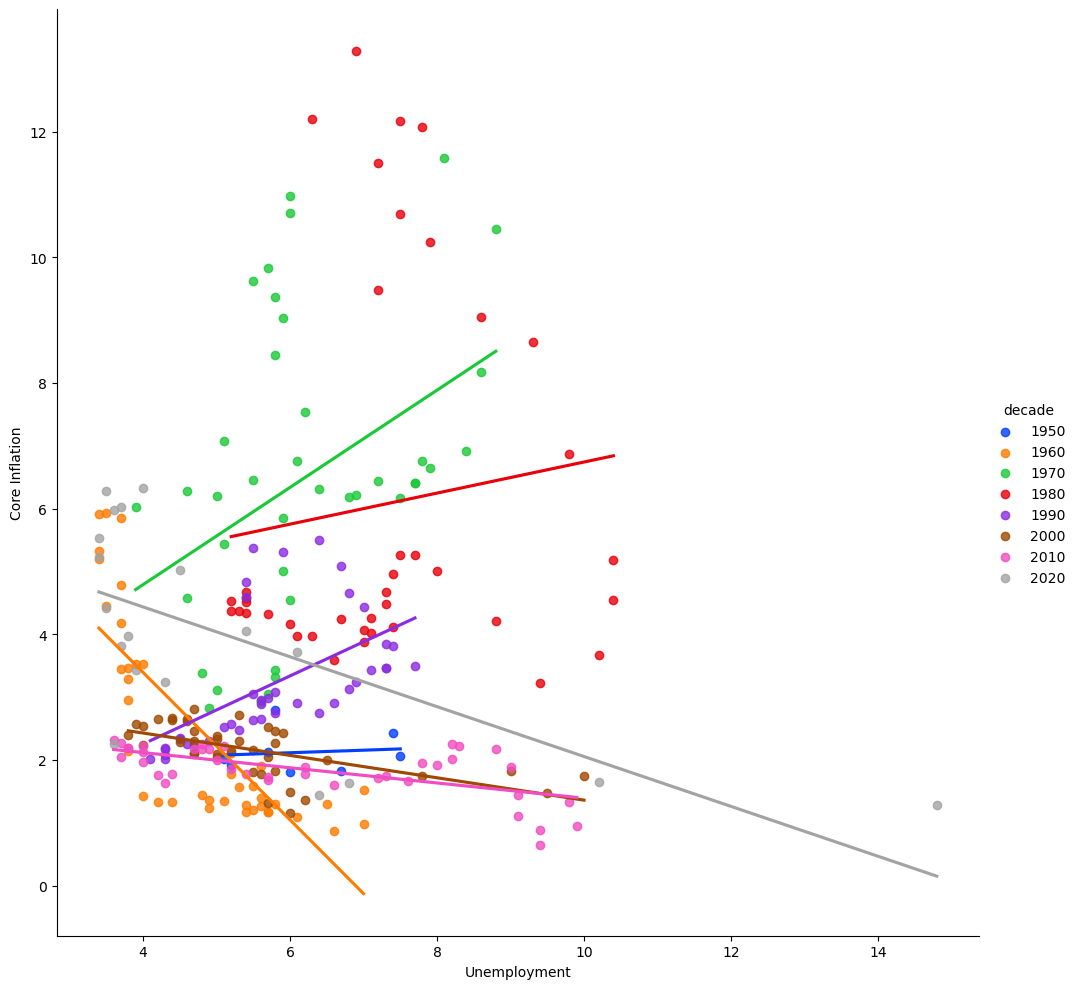

In [17]:
sns.lmplot(x="unemployment_rate", y="inflation_rate", data=phillips_curve_table.to_df(), 
                hue="decade", palette="bright", ci=None, height=10)
plt.xlabel("Unemployment")
plt.ylabel("Core Inflation")
plt.show();

<!-- BEGIN QUESTION -->

**Question 3.5**: What trends do you notice? Recalling question 3.1, does the traditional relationship behind the Phillips curve always hold? If not, why might that be?


Most of the curves do show a negative corelation indicative of a traditional Phillips curve where high inflation is low unemployment (i.e. most distinctivly the 1960s, 2020). However, some of the decades do produce plots that don't follow the traditional Phillips curve for example the 1970s to the 1990s where stagflation was present most likeley due to OPEC's oil embargo, the Vietnam war, and other policies in place. 

<!-- END QUESTION -->

### Part 4: FOMC Meeting Debrief
The Federal Open Market Committee met on Wednesday, September 20th, 2023. Check out [the most recent FOMC statement](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm).

<!-- BEGIN QUESTION -->

**Question 4.1**: What macroeconomic indicators do you see mentioned in the statement?


Some macroeconomic indicators included in the FOMC minutes are: economic activity in the form of expansion pace, job gains, unemployment rate, inflation, labour market conditions, and international financial development. The FOMC statement includes: job gains, unemployment rate and inflation. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.2**: What is the Federal Reserve’s target range for the federal funds rate?


The Fed comittee has decided that the target range for the FFR will be lowered by $\frac{1}{2}$ percentage point to $4\frac{3}{4}$ to 5 percent

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.3**: What is at least one reason the Fed cites behind their rate adjustment? You may use direct quotes from the statement.


The Fed cites that "progress on inflation and the balance of risks" as a reason behind the rate adjustment. They also note greater confidence that inflation is "moving sustainably toward 2 percent." From the minutes, the Fed also cites that "job gains had slowed, and the unemployment rate had moved up but remained low." Suggesting the labor market's cooling was a factor in their decision to lower the federal funds rate.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.4**: In 1-2 sentences, describe the general logic (not related to the statement) behind raising interest rates to lower inflation.


If you raise interest rates, we increase the borrowing costs which in turn would reduce consumer spending and business investment. This would decrease in demand and slow the economy down reducing an upward pressure on prices which would bring inflation down.

<!-- END QUESTION -->

**Congratulations!** You are done with the Data 88E macroeconomics lab! Hopefully this lab gave you a brief taste of applying data science to macroeconomic indicators.

The cell below will export your answers as a PDF. **Please save your notebook before exporting to ensure all of your responses are included!** You can then upload this PDF and assign pages on Gradescope.

In [21]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
export_notebook("lab07.ipynb", filtering=True, pagebreaks=True)
if path.exists('lab07.pdf'):
    display(HTML("Download your PDF <a href='lab07.pdf' download>here</a>."))
else:
    print("\n Pdf generation fails, please try the other methods described above")